In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
cd ..

C:\Users


In [8]:
cd admin\downloads

C:\Users\admin\downloads


In [9]:
Generator = ImageDataGenerator()

train_gen = Generator.flow_from_directory('catdog/train/train', target_size=(64, 64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.


In [10]:
train_gen

In [11]:
next(train_gen)

(array([[[[201., 186., 163.],
          [174., 167., 148.],
          [168., 156., 134.],
          ...,
          [190., 183., 164.],
          [172., 157., 134.],
          [233., 223., 213.]],
 
         [[213., 200., 192.],
          [190., 178., 166.],
          [187., 179., 168.],
          ...,
          [196., 177., 163.],
          [176., 160., 145.],
          [194., 184., 172.]],
 
         [[211., 217., 217.],
          [205., 205., 197.],
          [196., 195., 191.],
          ...,
          [194., 177., 167.],
          [170., 153., 146.],
          [185., 175., 163.]],
 
         ...,
 
         [[137., 138., 133.],
          [154., 155., 150.],
          [144., 137., 127.],
          ...,
          [142., 142., 142.],
          [159., 155., 152.],
          [146., 142., 139.]],
 
         [[119., 120., 115.],
          [121., 122., 117.],
          [139., 138., 133.],
          ...,
          [141., 141., 141.],
          [139., 143., 146.],
          [129., 133., 136.

In [12]:
x_batch, y_batch = next(train_gen)
print(x_batch.shape)
print(y_batch.shape)

(32, 64, 64, 3)
(32,)


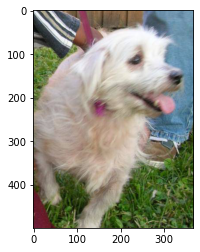

In [15]:
import matplotlib.pyplot as plt

from PIL import Image
img = Image.open('catdog/train/train/dogs/dog.9.jpg')
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

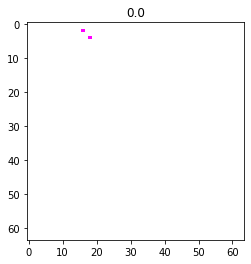

In [16]:

%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i])
  plt.title(y_batch[i])

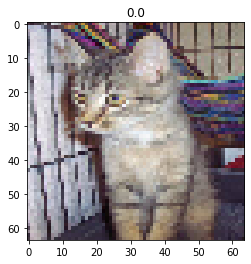

In [17]:
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i].astype('int32'))
  plt.title(y_batch[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

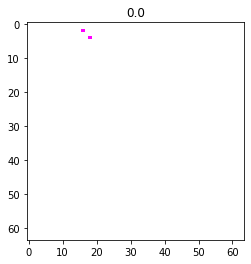

In [18]:
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i])
  plt.title(y_batch[i])

In [19]:
x_batch.max()

255.0

In [21]:
from keras.layers import *
from keras.models import Model

def build_model():
  x = Input(shape=(64, 64, 3))
  out = x

  out = Flatten()(out)
  out = Dense(512, activation='relu')(out)
  out = Dense(256, activation='relu')(out)
  out = Dense(64, activation='relu')(out)
  out = Dense(1, activation='sigmoid')(out)

  model = Model(x, out)
  return model

In [22]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,439,809
Trainable params: 6,439,809
Non-train

In [24]:
Generator = ImageDataGenerator(rescale=1/125.)

train_gen = Generator.flow_from_directory('catdog/train/train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.


In [25]:
x_batch, y_batch = next(train_gen)
print(x_batch.shape)
print(y_batch.shape)

(32, 64, 64, 3)
(32,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

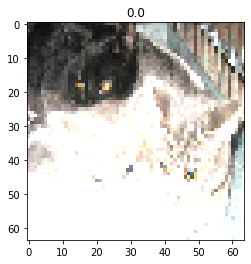

In [26]:
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i])
  plt.title(y_batch[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

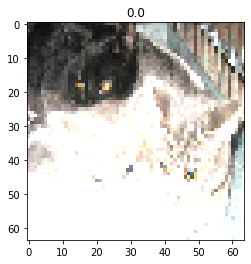

In [27]:
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i])
  plt.title(y_batch[i])

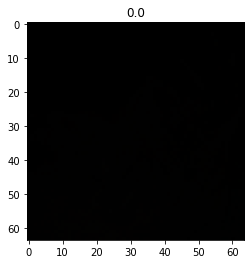

In [28]:
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i].astype('int32'))
  plt.title(y_batch[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

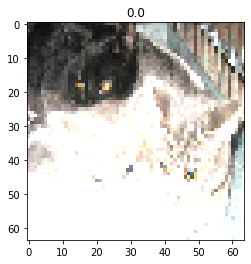

In [29]:
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i])
  plt.title(y_batch[i])

In [30]:
x_batch.max()

2.0400002

In [31]:
from keras.layers import *
from keras.models import Model

def build_model():
  x = Input(shape=(64, 64, 3))
  out = x

  out = Flatten()(out)
  out = Dense(512, activation='relu')(out)
  out = Dense(256, activation='relu')(out)
  out = Dense(64, activation='relu')(out)
  out = Dense(1, activation='sigmoid')(out)

  model = Model(x, out)
  return model

In [32]:
model = build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               6291968   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,439,809
Trainable params: 6,439,809
Non-tra

In [33]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(train_gen, epochs=2, steps_per_epoch=len(train_gen))

Epoch 1/2
782/782 [==============================] - 48s 61ms/step - loss: 0.6741 - binary_accuracy: 0.5814
Epoch 2/2
782/782 [==============================] - 50s 64ms/step - loss: 0.6514 - binary_accuracy: 0.6163


In [34]:
test_gen = Generator.flow_from_directory ('catdog', target_size=(64, 64),
                                         batch_size=32, classes=['test3'])

Found 3 images belonging to 1 classes.


In [35]:
pred = model.predict(test_gen)
pred.shape

(3, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


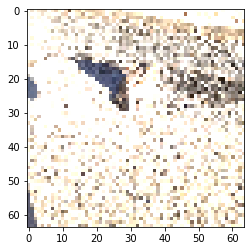

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


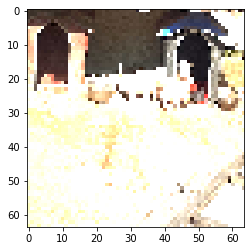

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


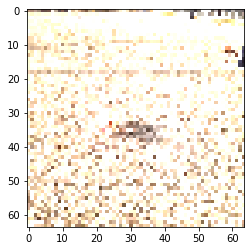

In [36]:
x_test, y_test = next(test_gen)
test_gen

for i in range(len(x_test)):
   plt.imshow(x_test[i])
   plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\ADMIN\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


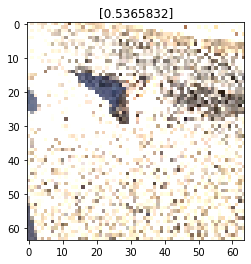

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


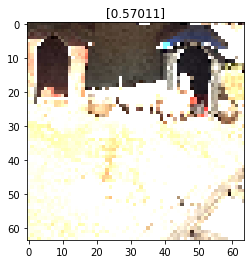

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


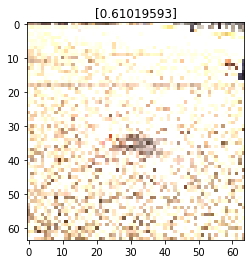

In [37]:
pred = model.predict(x_test[:3])

for i in range(3):
   plt.imshow(x_test[i])
   plt.title(pred[i])
   plt.show()


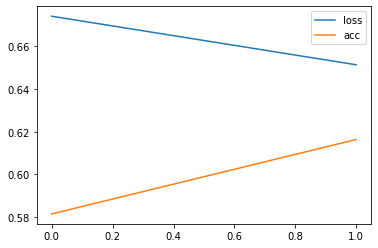

In [38]:
losses = history.history['loss']
accs = history.history['binary_accuracy']

plt.plot(losses, label='loss')
plt.plot(accs, label='acc')
plt.legend()
plt.show()


In [39]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(train_gen, epochs=2, steps_per_epoch=len(train_gen))

Epoch 1/2
782/782 [==============================] - 51s 65ms/step - loss: 0.6390 - binary_accuracy: 0.6292
Epoch 2/2
782/782 [==============================] - 50s 63ms/step - loss: 0.6298 - binary_accuracy: 0.6422


kaggle tutorial
https://www.kaggle.com/code/uysimty/keras-cnn-dog-or-cat-classification/notebook

In [47]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("catdog"))

['catdogtest2.ipynb', 'dogs-vs-cats', 'dogs-vs-cats.zip', 'sampleSubmission.csv', 'test1.zip', 'test3', 'train', 'train.zip']


In [48]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [51]:
filenames = os.listdir("catdog/train2/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [52]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [53]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


<AxesSubplot:>

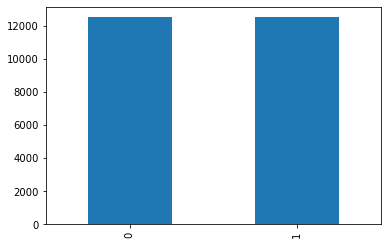

In [54]:
df['category'].value_counts().plot.bar()

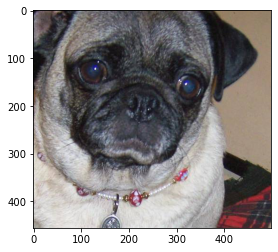

In [55]:
sample = random.choice(filenames)
image = load_img("catdog/train2/train/"+sample)
plt.imshow(image)

In [56]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [57]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [58]:
earlystop = EarlyStopping(patience=10)

In [59]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [60]:
callbacks = [earlystop, learning_rate_reduction]

In [61]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [62]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

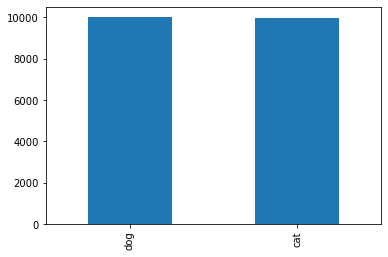

In [63]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

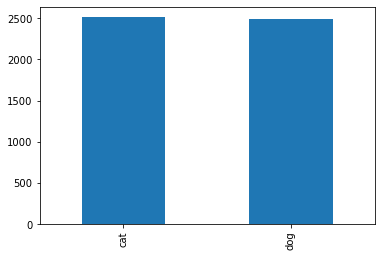

In [64]:
validate_df['category'].value_counts().plot.bar()

In [65]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [66]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "catdog/train2/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [67]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "catdog/train2/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [68]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "catdog/train2/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


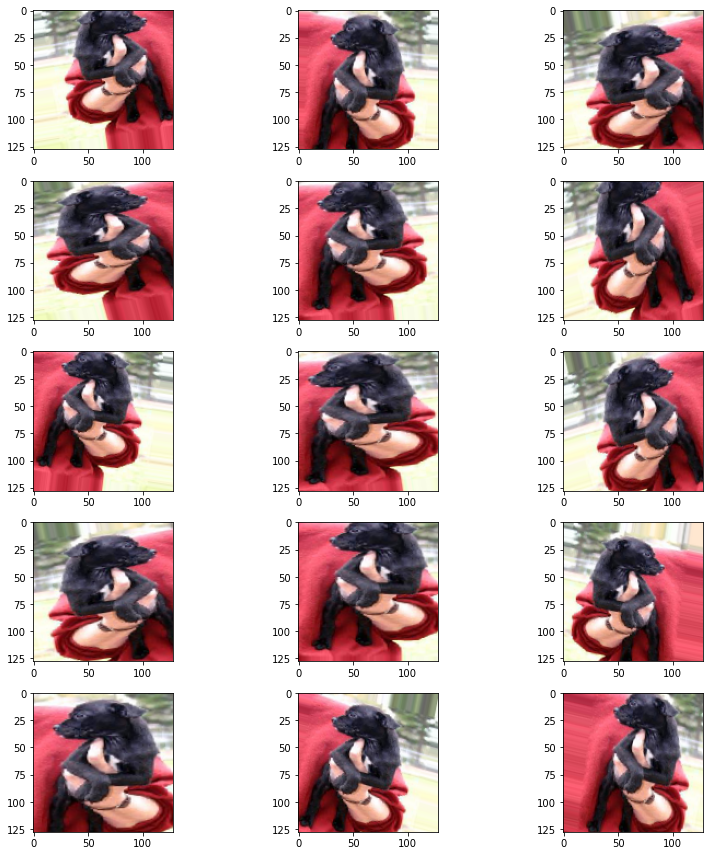

In [69]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [70]:
epochs=2 if FAST_RUN else 2
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/2


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2124/2263493274.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1333/1333 [==============================] - 348s 261ms/step - loss: 0.7312 - accuracy: 0.6372 - val_loss: 0.5598 - val_accuracy: 0.7115 - lr: 0.0010
Epoch 2/2
1333/1333 [==============================] - 353s 265ms/step - loss: 0.5504 - accuracy: 0.7248 - val_loss: 0.7250 - val_accuracy: 0.6933 - lr: 0.0010


In [71]:
model.save_weights("model.h5")

No handles with labels found to put in legend.


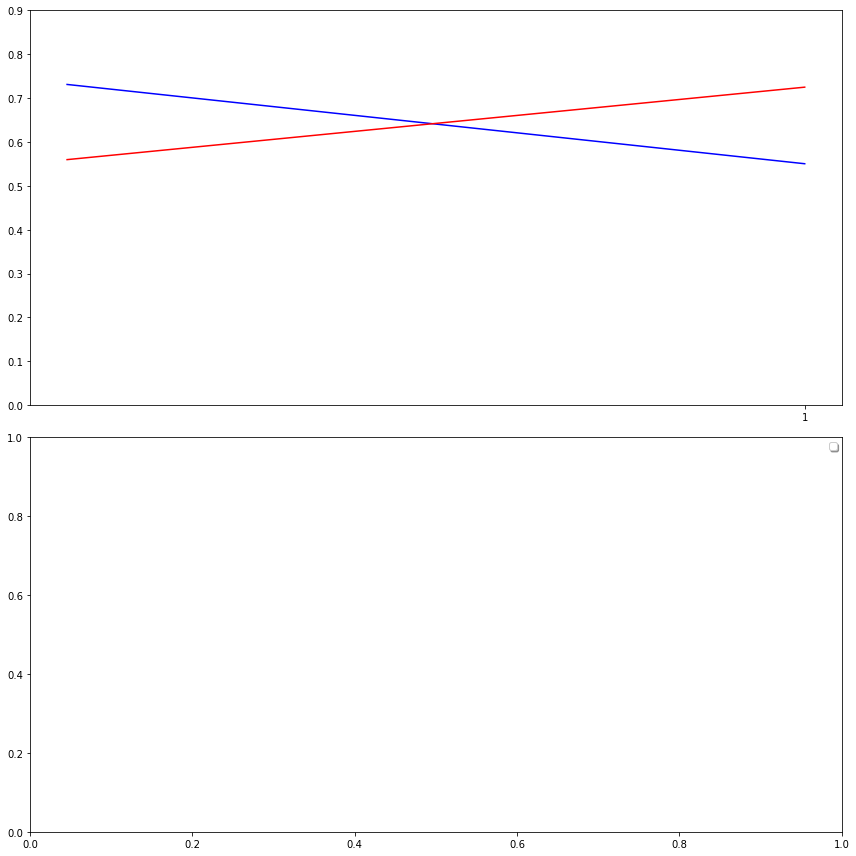

In [73]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

# ax2.plot(history.history['acc'], color='b', label="Training accuracy")
# ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
# ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [74]:
test_filenames = os.listdir("catdog/test3")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [75]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "catdog/test3", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 3 validated image filenames.


In [76]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2124/3090721588.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [77]:
test_df['category'] = np.argmax(predict, axis=-1)

In [78]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [79]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<AxesSubplot:>

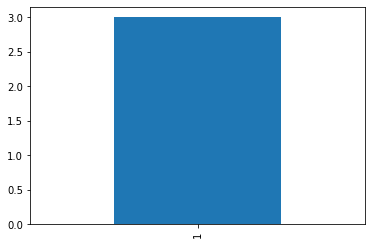

In [80]:
test_df['category'].value_counts().plot.bar()

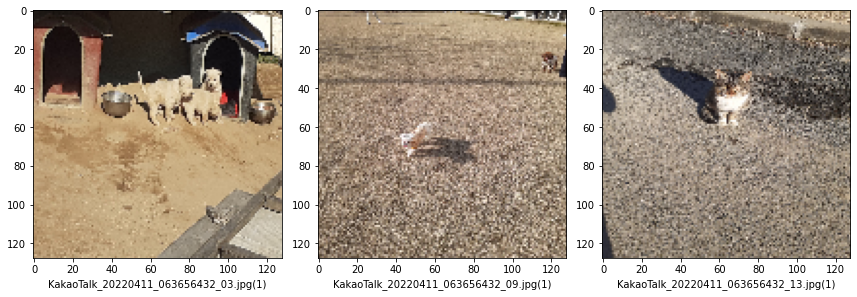

In [81]:
sample_test = test_df.head(3)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("catdog/test3/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [82]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)